# Exploring the data

In [3]:
import math

import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import RandomSampler
import torch.nn.functional as F

import matplotlib.pyplot as plt

## Load the data

Transformations: Turn the PIL images to tensors and transform them to lie in $[-1,1]$.

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Load the data.

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


The class labels.

In [6]:
classes = ("plane", "car", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck")
num_classes = len(classes)

## Data shape

In [7]:
print(f"Train: (Tensor: {trainset[0][0].shape}, {type(trainset[0][1])})")
print(f"Test: (Tensor: {testset[0][0].shape}, {type(testset[0][1])})")

Train: (Tensor: torch.Size([3, 32, 32]), <class 'int'>)
Test: (Tensor: torch.Size([3, 32, 32]), <class 'int'>)


## Some example images

Get a random selection of images for each class.

In [8]:
# A random sampler of the training set
random_sampler = RandomSampler(trainset)

# The number of images to show per class
num_images_per_class = 30

# Get some random images for each class
image_selection = [[] for i in range(num_images_per_class)]
for index in random_sampler:
    datapoint = trainset[index]
    if len(image_selection[datapoint[1]]) < num_images_per_class:
        image_selection[datapoint[1]].append(datapoint[0])
    if all(len(images) >= 10 for images in image_selection):
        break

Plot them.

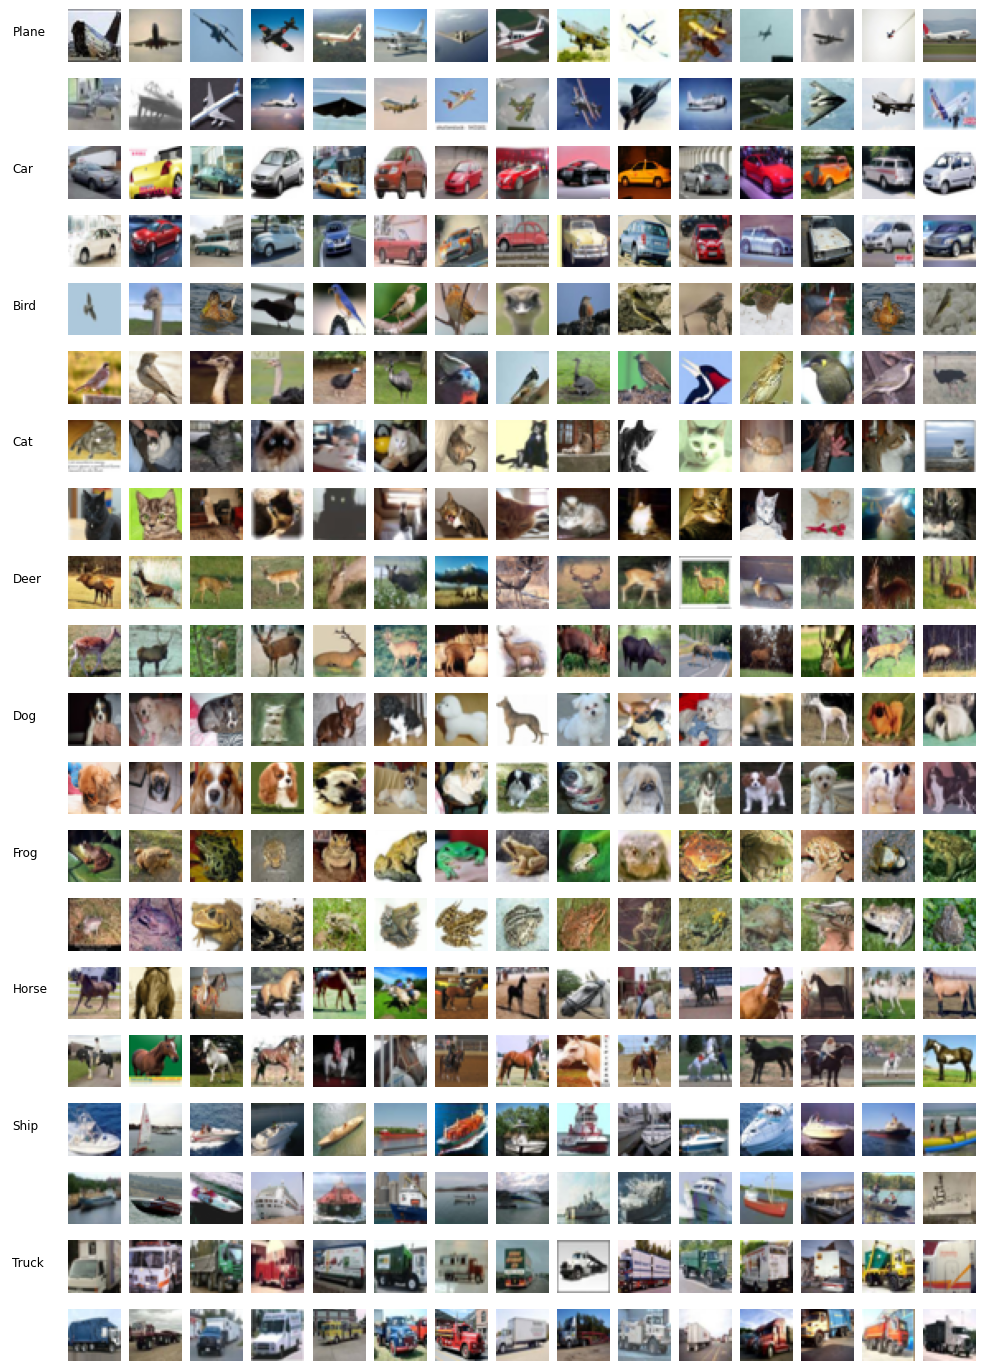

In [11]:
# Display the images in a grid
num_img_columns = math.ceil(num_images_per_class / 2)
fig, axs = plt.subplots(
    num_classes * 2,
    num_img_columns + 1, 
    figsize=(num_img_columns + 1, num_classes * 2))
    
for cls in range(num_classes):
    for i in range(num_images_per_class):
        # Get the image as a numpy array
        img = image_selection[cls][i].numpy()
        # Transpose the array, so that the colour channel is last
        img = img.transpose((1, 2, 0))
        # Unnormalise the image
        img = img / 2 + 0.5
        # Plot it
        ax = axs[2 * cls + (i // num_img_columns)][(i % num_img_columns) + 1]
        ax.set_axis_off()
        ax.imshow(img)
    # Set the row title
    ax = axs[2 * cls][0]
    ax.text(0.1, 0.5, classes[cls].capitalize(), size="large")
    ax.set_axis_off()
    # Remove the axes from the one below too
    axs[2 * cls + 1][0].set_axis_off()

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
plt.show()

## Reducing resolution

What do the examples look like when we reduce resolution from $32 \times 32$ to $4 \times 4$?

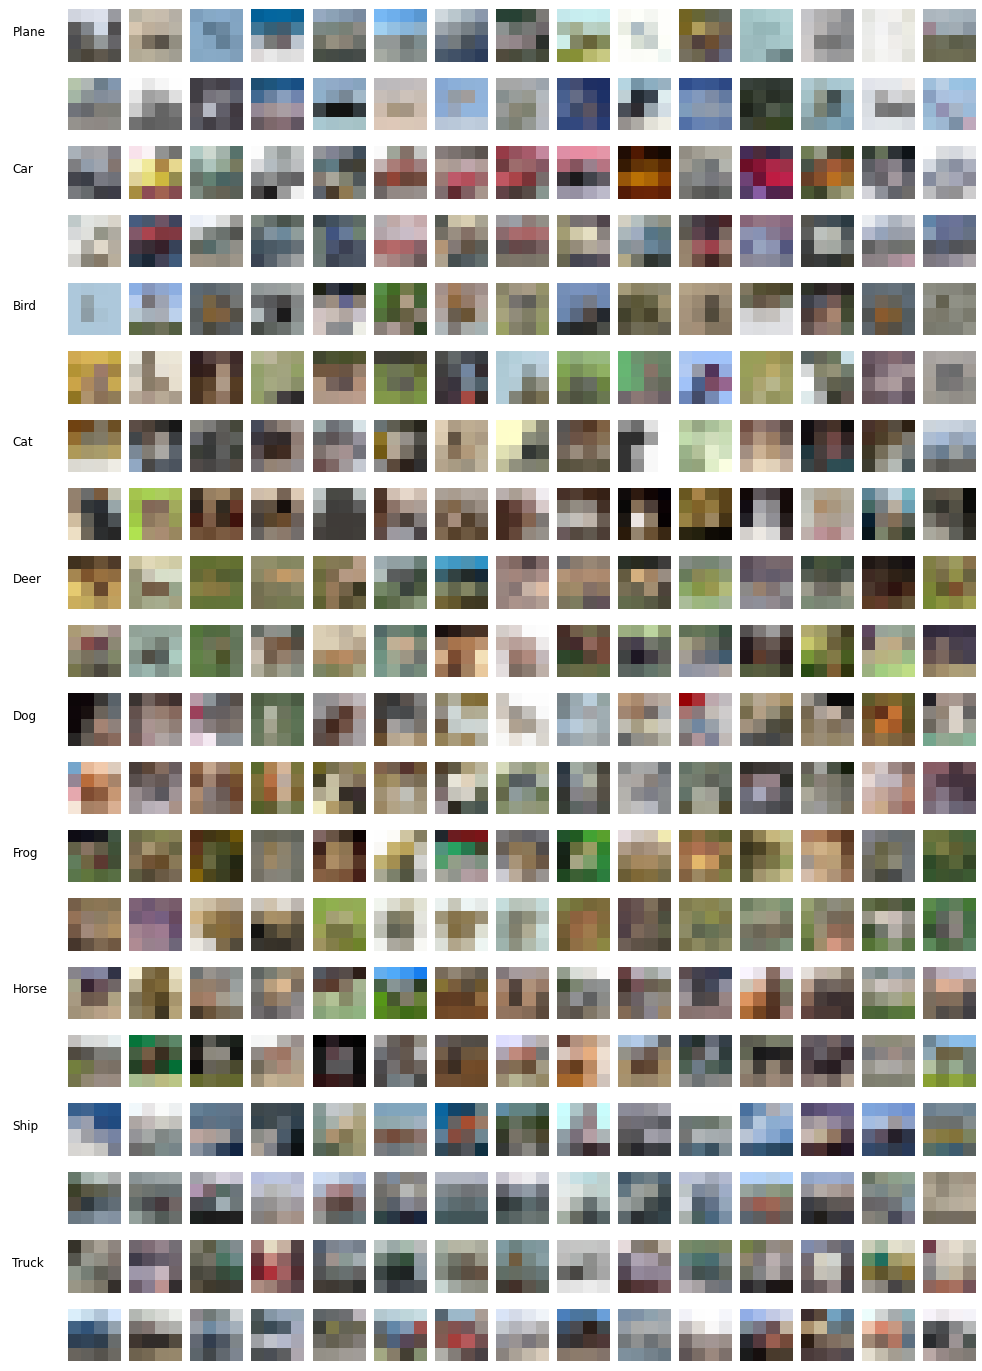

In [12]:
# Display the reduced images in a grid
num_img_columns = math.ceil(num_images_per_class / 2)
fig, axs = plt.subplots(
    num_classes * 2,
    num_img_columns + 1, 
    figsize=(num_img_columns + 1, num_classes * 2))
    
for cls in range(num_classes):
    for i in range(num_images_per_class):
        # Get the original
        img = image_selection[cls][i]
        # Add an size-1 dimension for the batch
        img = torch.unsqueeze(img, 0)
        # Reduce the image
        img = F.avg_pool2d(img, 8)
        # Get rid of the batch dimension
        img = torch.squeeze(img)
        # Turn it into a numpy array
        img = img.numpy()
        # Transpose the array, so that the colour channel is last
        img = img.transpose((1, 2, 0))
        # Unnormalise the image
        img = img / 2 + 0.5
        # Plot it
        ax = axs[2 * cls + (i // num_img_columns)][(i % num_img_columns) + 1]
        ax.set_axis_off()
        ax.imshow(img)
    # Set the row title
    ax = axs[2 * cls][0]
    ax.text(0.1, 0.5, classes[cls].capitalize(), size="large")
    ax.set_axis_off()
    # Remove the axes from the one below too
    axs[2 * cls + 1][0].set_axis_off()

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
plt.show()